Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Do NOT add any cells to the notebook!

Make sure you fill in any place that says `YOUR CODE HERE` or _YOUR ANSWER HERE_ , as well as your name and group below:

In [1]:
NAME = "Heryavenko Denys, Polianska Daria, Ladstätter Paul Simon"
STUDENTID = "12029013, 12131957, 12314026"
GROUPID = "Group 6";

# Assignment 5 (Group)
In Assignment 2, as a group, you trained yourselves in accessing and characterising two data sources. You also sketched out a data-science project based on these data sources. In this assignment, based on this project idea, you should select, implement, and describe 3 appropriate visualisations.

The following materials provide the necessary background:
* the slide deck on visualisations (Unit 5) and the corresponding notebook;
* Chapter 3 of "Data Science from Scratch"
* the mandatory read on "Task-Based Effectiveness of Basic Visualizations" available from MyLearn: _B. Saket, A. Endert and Ç. Demiralp (2019), "Task-Based Effectiveness of Basic Visualizations," in IEEE Transactions on Visualization and Computer Graphics, vol. 25, no. 7, pp. 2505-2512, DOI: 10.1109/TVCG.2018.2829750_

Requirements:
* Required reading: Study the paper by Saket et al. (2019) and explicitly refer to the task types, pros & cons of different visualisations as identified by these authors when answering the questions on this assignment.
* The visualisation should be appropriate the chosen tasks on the data sets.
* You should use at least two different types of visualisations. Even if two tasks in two steps below were identical (e.g., two aggregation tasks), you would be expected to choose a different visualisation for each. 
* As contrast to Assignment 2, you will be expected to use `pandas` to represent and to prepare the data sets for visualisation.
* As for the data sets collected during Assignment 2, to avoid confusion:
  * Use the genuine ones, not the manipulated ones (having anomalies introduced). 
  * If you have worked with excerpts (samples) from the original and genuine datasets, you can continue to use these. You are also free to use the complete datasets, but this is not expected.
  * Please stick to your project description in Assignment 2 when choosing tasks and corresponding visualisations.

-----
## Step 1 (6 points)

Select, implement and describe one visualisation for data source 1 (in isolation from data source 2).

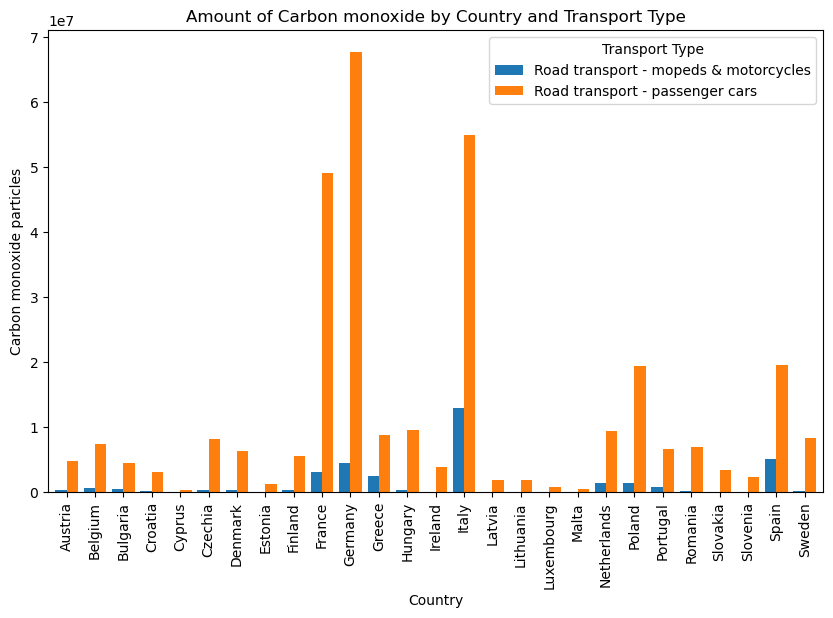

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

air_data = pd.read_csv("./data/data_notebook-1_air-quality.csv")

# we want to show data only for the EU countries
eu_countries = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"]  


eu_data = air_data[air_data['geo'].isin(eu_countries)] # we include only the eu countries that are in the list above


# we group the data by country and transport type. The result is the sum of carbon monoxide particles.
grouped_data = eu_data.groupby(['geo', 'src_nfr'])['OBS_VALUE'].sum().unstack()

# here we create a bar chart 
grouped_data.plot(kind='bar', figsize=(10, 6), width=0.8) # here we play around with the side, so the names of the countries don't overlap and are readable.
plt.title('Amount of Carbon monoxide by Country and Transport Type')
plt.xlabel('Country')
plt.ylabel('Carbon monoxide particles')
plt.legend(title='Transport Type')

plt.show()


Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

1. Dataset 1 (Air Pollutants by Source):
- Task: Characterize Distribution. (What is the distribution of air pollution levels across different European countries? Which countries have the highest and lowest pollution levels?)
- Visualization: Bar Chart. Reasoning: Per Saket et al. (2019), bar charts are well-suited for understanding distributions and clustering, as they allow easy comparison across categories. This would let users see which countries or sources have the highest pollution levels, making the distribution clear across the dataset.

- What does the visualization show exactly?

The visualization shows the total carbon monoxide emissions for European Union countries, broken down by transport type—"mopeds & motorcycles" and "passenger cars." We can see how much pollution each country produces from these two sources. For example, countries like Germany and France have much higher emissions from passenger cars compared to others, while mopeds and motorcycles contribute much less overall. 
-  What does the visualization contribute to answering your project’s questions?

This visualization helps us answer the project’s main question by showing how road traffic contributes to air pollution across Europe. It highlights that passenger cars are a major source of carbon monoxide emissions. By comparing emissions between countries, it also helps identify which nations might have higher pollution due to traffic. This supports the idea of the project that traffic levels contribute significantly to air pollution.

------
## Step 2 (6 points)

Select, implement and describe one visualisation for data source 2 (in isolation from data source 1).

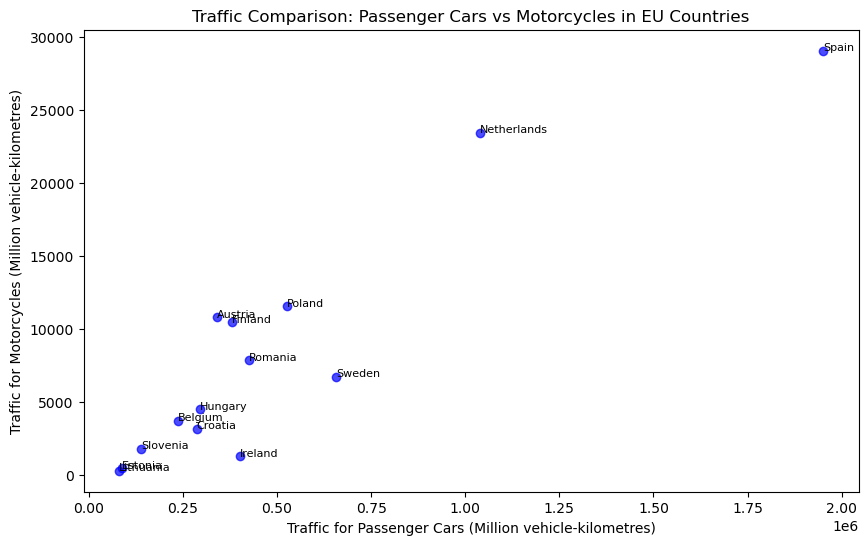

In [3]:
traffic_data = pd.read_json("./data/data_notebook-1_traffic.json")

# we first want to filter out the registration of vehicles to include domestic and foreign traffic
vehicle_registration = traffic_data['regisveh'] == 'Traffic performed on the national territory by vehicles registered in the reporting country or in foreign countries'

# next, as we have different vehicle types, we want to use only passenger cars and motorcycles for our analysis. So we filter them out
vehicle_type = traffic_data['vehicle'].isin(['Motorcycles and mopeds', 'Passenger cars'])

# same as in the previouse file, we want to analyze only the EU countries
eu_countries = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"]

eu_filter = traffic_data['geo'].isin(eu_countries)
filtered_df = traffic_data[vehicle_registration & vehicle_type & eu_filter]

# we group the data by country and transport type. The result is the sum of traffic. Also getting rid of missing values.
grouped_data = filtered_df.groupby(['geo', 'vehicle'])['OBS_VALUE'].sum().unstack().dropna()

# Scatterplot: Traffic for Passenger Cars vs. Motorcycles
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['Passenger cars'], grouped_data['Motorcycles and mopeds'], color='blue', alpha=0.7)
plt.title('Traffic Comparison: Passenger Cars vs Motorcycles in EU Countries')
plt.xlabel('Traffic for Passenger Cars (Million vehicle-kilometres)')
plt.ylabel('Traffic for Motorcycles (Million vehicle-kilometres)')

# loop over grouped_data rows for annotating the plot 
for country, row in grouped_data.iterrows():
    plt.text(row['Passenger cars'], row['Motorcycles and mopeds'], country, fontsize=8)

plt.show()

Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

2. Dataset 2 (Road Motor Vehicle Traffic):
- Task: Find Extremum (What are the highest and lowest levels of road traffic performance (in vehicle kilometers) recorded across different countries?).

- Visualization: Scatter Plot. Reasoning: A scatter plot enables users to quickly identify extremum values by visualizing data points individually. Using a scatter plot with traffic data can highlight maximum traffic levels, and as per guideline G3, scatter plots excel at tasks involving precise anomaly or outlier detection.

- What does the visualization show exactly?

The scatter plot compares traffic levels for passenger cars and motorcycles across EU countries. Each point represents a country, with the x-axis showing traffic for passenger cars and the y-axis for motorcycles. The plot reveals that Spain and the Netherlands have particularly high traffic levels for motorcycles, while most other countries show a lower proportion of motorcycle use compared to cars. Additionally, it highlights differences between countries in terms of how much their traffic relies on motorcycles versus passenger cars.

4. What does the visualization contribute to answering your project's questions?

This contributes to the project by showing that passenger cars dominate traffic in most countries, while motorcycles play a significant role only in a few cases (e.g., Spain). It also helps identify potential outliers, which may relate to air pollution trends (e.g. high motorcycle traffic in Spain could correlate to specific air pollutant patterns compared to other countries).

-----
## Step 3  (7 points)

Merge the two data sets (or, relevant subsets thereof) based on your project idea from Assignment 2. Select, implement and describe one visualisation on the combined data set. Make sure you visualize variables taken from both original data sets.

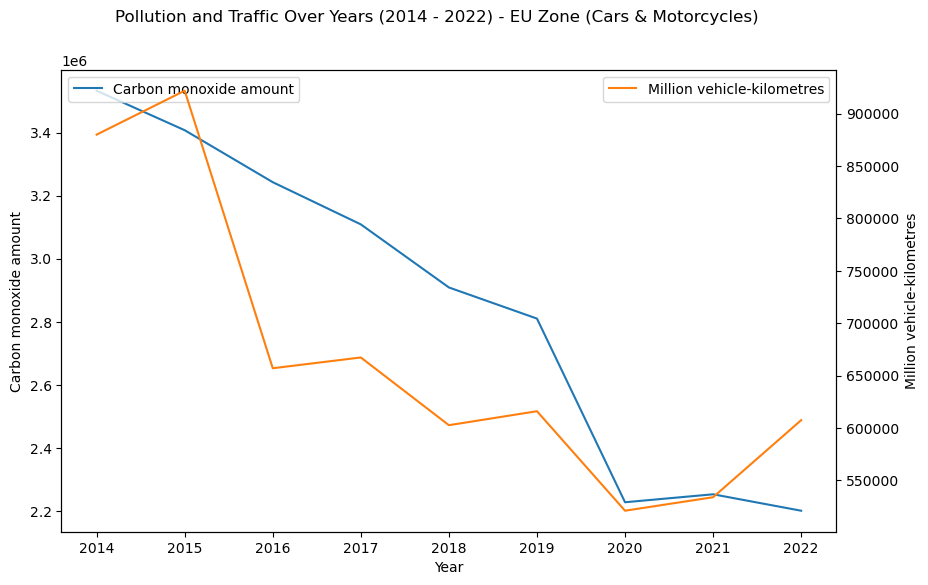

In [4]:
air_data = pd.read_csv("./data/data_notebook-1_air-quality.csv")
traffic_data = pd.read_json("./data/data_notebook-1_traffic.json")

eu_countries = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"]


#--------- traffic data
traffic_data.rename(columns={'OBS_VALUE': 'Traffic'}, inplace=True) # both datasets have the same lable for the values, so to avoid issues with the merger, we rename the columns

vehicle_registration_traffic = traffic_data['regisveh'] == 'Traffic performed on the national territory by vehicles registered in the reporting country or in foreign countries'
vehicle_type_traffic = traffic_data['vehicle'].isin(['Motorcycles and mopeds', 'Passenger cars'])
eu_filter_traffic = traffic_data['geo'].isin(eu_countries)

year_range = list(range(2014, 2023)) # we want to take only the year range 2014 - 2022
year_filter_traffic = traffic_data['TIME_PERIOD'].isin(year_range)

filtered_traffic_data = traffic_data[year_filter_traffic & vehicle_registration_traffic & vehicle_type_traffic & eu_filter_traffic] # we include all the filters

traffic_agg = filtered_traffic_data.groupby('TIME_PERIOD')['Traffic'].sum().reset_index()

#--------- air quality data
air_data.rename(columns={'OBS_VALUE': 'Pollution'}, inplace=True)

eu_filter_air = air_data['geo'].isin(eu_countries) 
year_filter_air = air_data['TIME_PERIOD'].isin(year_range)

filtered_air_data = air_data[eu_filter_air & year_filter_air]

air_agg = filtered_air_data.groupby('TIME_PERIOD')['Pollution'].sum().reset_index()


# --------- now we merge
merged_df = pd.merge(traffic_agg, air_agg, on='TIME_PERIOD')


# and now the ploting begins. We research a bit how to plot two y axis's:
fig, ax1 = plt.subplots(figsize=(10, 6))

# we plot pollution on the first y-axis
ax1.plot(merged_df['TIME_PERIOD'], merged_df['Pollution'], label='Carbon monoxide amount')
ax1.set_xlabel('Year')
ax1.set_ylabel('Carbon monoxide amount')
ax1.tick_params(axis='y')

# and traffic on the second y-axis
ax2 = ax1.twinx()
ax2.plot(merged_df['TIME_PERIOD'], merged_df['Traffic'], color='tab:orange', label='Million vehicle-kilometres')
ax2.set_ylabel('Million vehicle-kilometres')
ax2.tick_params(axis='y')

ax1.legend(loc='upper left') 
ax2.legend(loc='upper right')

fig.suptitle('Pollution and Traffic Over Years (2014 - 2022) - EU Zone (Cars & Motorcycles)')

plt.show()

Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the combined data set supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

3. Connecting Task (Correlation between Traffic and Pollution):
- Task: Find Correlation.
- Question: Is there a correlation between the levels of road traffic (vehicle kilometers) and air pollution levels over time?
- Visualization: Line Chart.
- Reasoning: A line chart is effective for displaying trends and correlation over time, as highlighted in guideline G2. By plotting both pollution and traffic levels on two separate y-axes, the chart clearly illustrates how both variables change over the years (2014–2022). This helps identify whether increases in road traffic correspond with rises in pollution levels, helping to spot any potential correlation or trends between the two datasets.
- What does the visualization show exactly: trends in carbon monoxide pollution (blue line) and road traffic performance (orange line) for cars and motorcycles across EU countries from 2014 to 2022. More specific:
     - decrease in carbon monoxide pollution over the years
     - drop in traffic from 2019 to 2020
- What does the visualization contribute to the project's questions? The chart proves that traffic and pollution might be connected since changes in traffic seem to match changes in pollution over time. More specific:
     - in 2015, 2019, and 2020, the lines follow closely, suggesting that pollution and traffic are moving together during these periods
     - from 2020 till 2021 they are almost ident
     - steady decrease in both metrics over time
     - but pollution kept going down steadily from 2014 to 2022, even when traffic didn’t drop as much. This could mean that other things(like electro-vehicles gaining popularity) also helped reduce pollution.
     
Overall, the overlaps and shared trends strengthen the assumption that traffic impacts pollution, but the differences in the later years(2021 - 2022) suggests that additional factors also played the role.

-----
## Step 4  (1 points)

Persist the merged dataset from Step 3 as a file.

In [5]:
# Saving merged dataset to a CSV file
merged_df.to_csv('./data/merged_traffic_air_quality.csv', index=False)